In [1]:
from nilmtk.api import API
import warnings

warnings.filterwarnings("ignore")
from nilmtk.disaggregate import SGN, DM, DMCoral, GatedDM

In [2]:
import torch
import torch.nn.functional as F
from torch.utils.data import Dataset
import pytorch_lightning as pl

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import os

# from src import *

USE_GPU = True
device = torch.device("cuda:0" if USE_GPU and torch.cuda.is_available() else "cpu")
print(torch.__version__, pl.__version__, device)

2.0.1 2.0.4 cuda:0


GatedDM
Started training for  GatedDM
Joint training for  GatedDM
............... Loading Data for training ...................
Loading data for  ukdale  dataset
Loading building ...  1
Dropping missing values
Train Jointly
...............Gated DM partial_fit running...............
First model training for  washing machine
Mean 17.28567 std 154.07681 Threshold -0.04728595560242268 zero -0.112188645
Is Time embed used ?  True
Finished training for  GatedDM
Joint Testing for all algorithms
Loading data for  ukdale  dataset
Dropping missing values
Generating predictions for : GatedDM
15180 900 120
2
Batch 0 torch.Size([64, 1, 900])
Batch 1 torch.Size([56, 1, 900])
Inference Time consumption: 48.27097511291504s.
Predict shape (14400,)
[-0.10809124 -0.10924055 -0.11283523 ... -0.11240717 -0.11036375
 -0.11308696]
............  mae  ..............
                   GatedDM
washing machine  44.758194
............  f1score  ..............
                  GatedDM
washing machine  0.056555
..

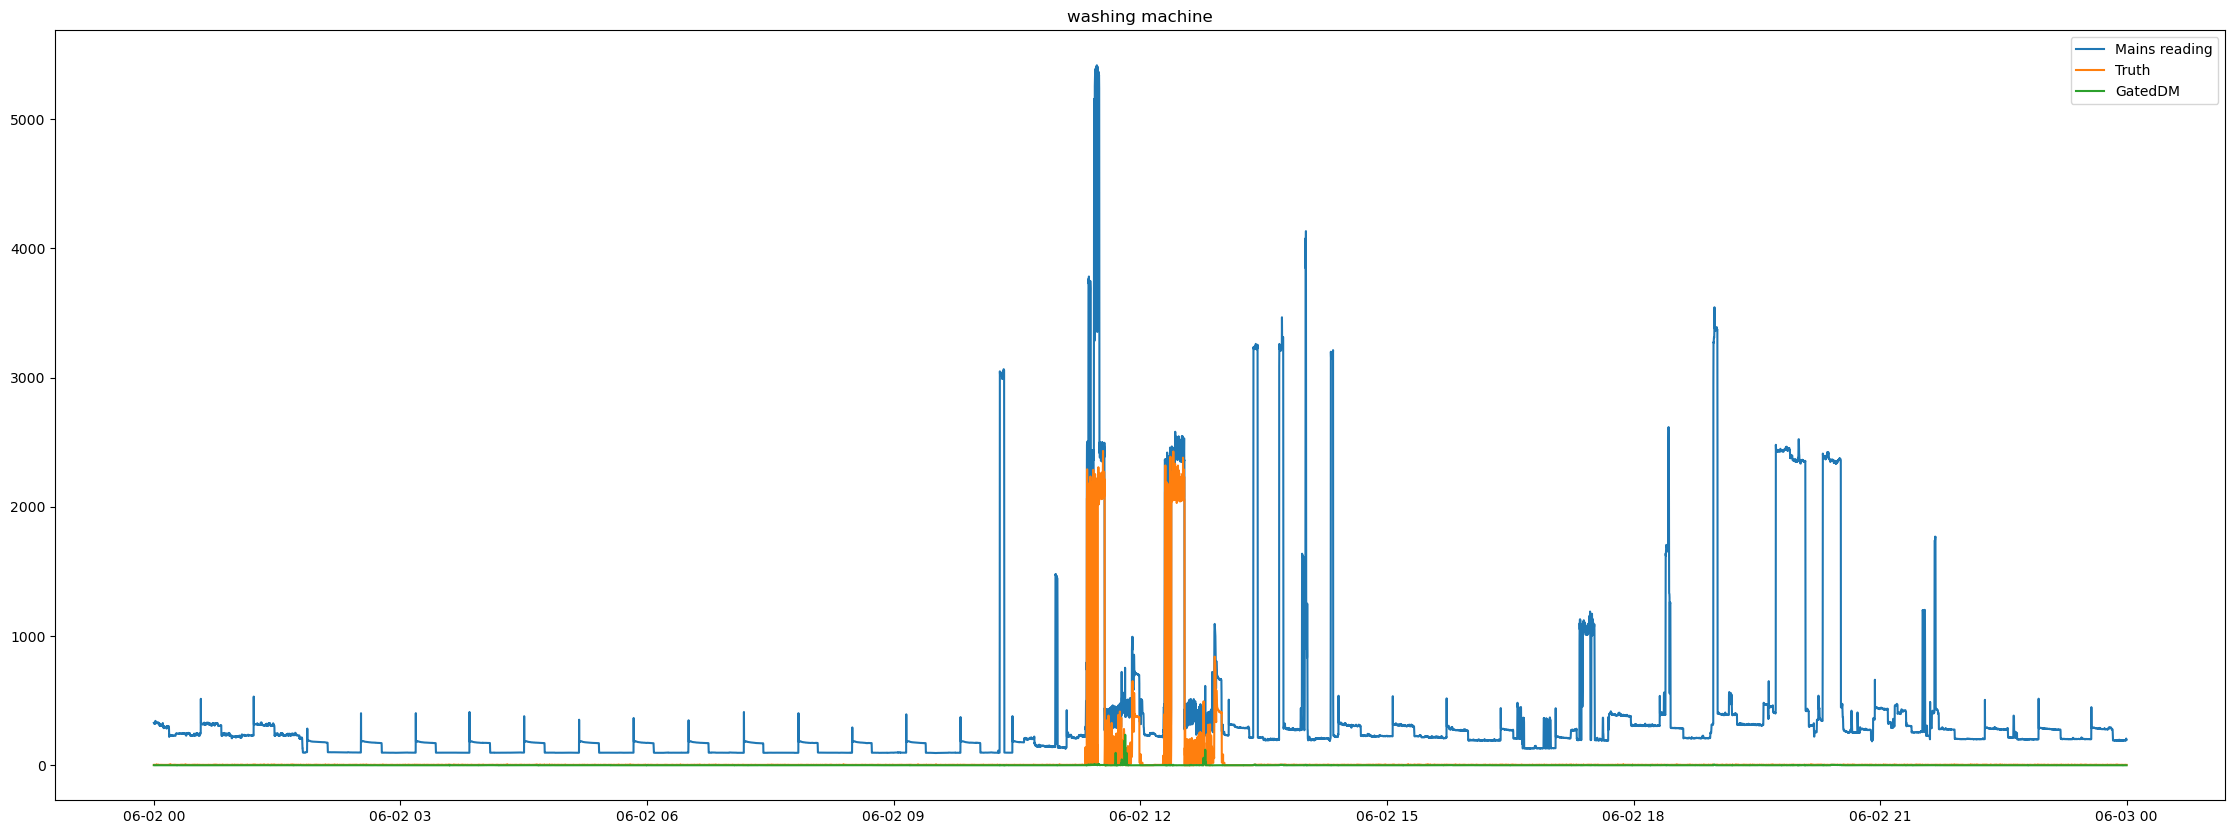

In [3]:
e = {
    # Specify power type, sample rate and disaggregated appliance
    'power': {
        'mains': ['active'],
        'appliance': ['active']
        # 'mains': ['apparent'],  # problem: ukdale active, redd apparent
        # 'appliance': ['active']
    },
    'sample_rate': 6,
    # 'appliances': ['fridge'],
    'appliances': ['washing machine'],
    # Universally no pre-training
    'pre_trained': False,
    # Specify algorithm hyper-parameters
    # 'methods': {"DMCoral": DMCoral(
    #     {'n_epochs': 40, 'batch_size': 64, 'sequence_length': 480, 'overlapping_step': 120,
    #      'test_only': True, 'uda': True, 'lambda_coral': 0.5})},
    'methods': {"GatedDM": GatedDM(
        {'n_epochs': 50, 'batch_size': 64, 'sequence_length': 900, 'appliance_length': 120, 'overlapping_step': 12,
         'test_only': True})},
    # Specify train and test data
    'train': {
        'datasets': {
            'ukdale': {
                'path': 'mnt/ukdale.h5',
                'buildings': {
                    1: {
                        'start_time': '2013-05-01',
                        'end_time': '2013-09-01'
                    }
                }
            },
        }
        # 'datasets': {
        #     'ukdale': {
        #         'path': 'mnt/ukdale.h5',
        #         'buildings': {
        #             1: {
        #                 'start_time': '2013-05-01',
        #                 'end_time': '2013-06-30'
        #             }
        #         }
        #     },
        # }
    },
    # 'transfer': {
    #     'datasets': {
    #         'redd': {
    #             'path': 'mnt/redd.h5',
    #             'buildings': {
    #                 1: {
    #                     'start_time': '2011-04-21',
    #                     'end_time': '2011-05-20'
    #                 }
    #             }
    #         },
    #     },
    # },
    'test': {
        'datasets': {
            'ukdale': {
              'path': 'mnt/ukdale.h5',
              'buildings': {
                    2: {
                          'start_time': '2013-06-02 00:00',
                          'end_time': '2013-06-03 00:00'
                    }
                }
              },
            # 'redd': {
            #     'path': 'mnt/redd.h5',
            #     'buildings': {
            #         1: {
            #             'start_time': '2011-04-19',
            #             'end_time': '2011-04-21'
            #         }
            #     }
            # },
        },
        # Specify evaluation metrics
        'metrics': ['mae', 'f1score', 'recall', 'precision', 'nep', 'omae', 'MCC']
    }
}

API(e)